**Navn på gruppens medlemmer:**

# Tidsutvikling av bølgefunksjonen

Utviklingen av en tilstand $\Psi = \Psi(x, t)$ over tid er beskrevet av den tidsavhengige Schrödingerlikningen
$$ i \hbar \frac{\partial \Psi}{\partial t} = \hat{H} \Psi = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2} + V \Psi $$

Ved hjelp av separasjon av variable er det mulig å vise at en generell løsning av denne ligningen er
$$ \Psi(x, t) = \sum_n c_n \psi_n(x) e^{-i E_n t / \hbar} $$
der summen går over alle de stasjonære tilstandene $\psi_n$ med energier $E_n$ som løser den tidsuavhengige Schrödingerligningen
$$ \hat{H} \psi_n = -\frac{\hbar^2}{2 m} \psi_n'' + V \psi_n = E_n \psi_n $$

Det viser seg at *enhver* tilstand $\Psi(x, t)$ kan skrives som en slik lineærkombinasjon av de stasjonære tilstandene, og vi sier derfor at de utgjør et *fullstendig sett*.
Gitt en vilkårlig starttilstand $\Psi_0 = \Psi(x, 0)$, er det bare snakk om å finne de rette konstantene $c_n$ som oppfyller
$$ \Psi_0 = \sum_n c_n \psi_n $$
og vi har da all informasjonen vi trenger for å beregne $\Psi$ for alle $t$.
Dette er ingen vanskelig oppgave, da de stasjonære tilstandene er *ortogonale*, og *ortonormale*, så lenge vi velger dem normerte, dvs.
$$\int \psi_m \psi_n \mathrm{d}x = \delta_{m n} = \begin{cases}0 & \text{for}\,\, m \neq n \\ 1 & \text{for}\,\, m = n\end{cases}$$
Vi kan utnytte dette til å "plukke ut" en av konstantene $c_m$ i lineærkombinasjonen ved å integrere begge sider av likningen:
$$ \int \Psi_0 \psi_m \mathrm{d}x = \int \sum_n c_n \psi_n \psi_m \mathrm{d}x = \sum_n c_n \int \psi_n \psi_m \mathrm{d}x = \sum_n c_n \delta_{m n} = c_m $$

I denne øvingen skal vi se nærmere på egenskapene om ortogonalitet og fullstendighet i en diskretisert modell og utnytte dette til å studere tidsutviklingen til vilkårlige starttilstander i vilkårlige potensialer.

Vi bruker samme modell for diskretiseringen av rommet som i den første numeriske øvingen.
Der diskretiserte vi rommet i $N + 2$ ekvidistante punkter fra $x_0$ til $x_{N+1}$ og satte $V(x \leq x_0) = V(x \geq x_{N+1}) = \infty$, slik at $\psi_n(x \leq x_0) = \psi_n(x \geq x_{N+1}) = 0$.
Vi innførte så et vilkårlig potensial $\boldsymbol{V} = [V(x_1), \ldots, V(x_N)]^T$ på rutenettet $\boldsymbol{x} = [x_1, \ldots, x_N]^T$ og fant de stasjonære tilstandene $\boldsymbol{\psi_n} = [\psi_n(x_1), \ldots, \psi_n(x_N)]^T$ og energiene $E_n$ ved å finne egenverdiene og egenvektorene til Hamiltonmatrisen $H$.

Hamiltonmatrisen $H$ er en reell og symmetrisk matrise, og har da ifølge et teorem fra lineæralgebraen ortogonale egenvektorer.
Vi kan så oversette formen for den generelle løsningen på den tidsavhengige Schrödingerlikningen til vår diskretiserte modell med vektorlikningen
$$ \boldsymbol{\Psi} = \boldsymbol{\Psi}(x, t) = [\Psi(x_1, t), \ldots, \Psi(x_N, t)]^T = \sum_{n=1}^{N} c_n \boldsymbol{\psi_n} e^{-i E_n t / \hbar} $$
I denne diskretiserte modellen får vi dermed helt tilsvarende ortogonalitets- og fullstendighetsegenskaper som med de eksakte funksjonene $\psi$ og $\Psi$.

In [7]:
# uncomment ONE line to choose matplotlib backend
# if using Jupyter Notebook, use interactive "notebook" backend for best results
# if using Jupyter Lab, use interactive "widget" backend for best results
# if both fail, use static "inline" backend
#%matplotlib notebook 
#%matplotlib widget 
#%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML, clear_output

# helpful to raise exception upon complex number calculation error
# instead of just a useless warning
import warnings
warnings.filterwarnings(action="error", category=np.ComplexWarning)

Vi kommer til å få bruk for metoden fra den første numeriske øvingen til å finne de stasjonære tilstandene $\boldsymbol{\psi_n}$ og energiene $E_n$ i potensialet $\boldsymbol{V}$ for en partikkel med masse $m$.
Derfor har vi lagt ved fungerende funksjonalitet for dette.
Du kan selvfølgelig erstatte dette med din egen løsning fra den første numeriske øvingen, da du sikkert er bedre kjent med denne.

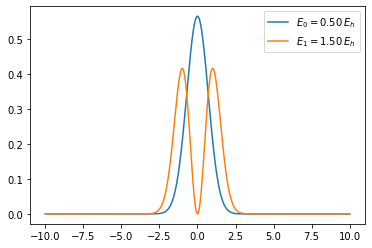

In [8]:
hbar = 1 # using atomic units

def hamiltonian(x, v, m):
    ''' x = array of x-points
        v = potential function
        m = particle mass
    '''
    dx = x[1] - x[0]
    diag = hbar**2 / (m*dx**2) + v
    semidiag = np.full(len(x)-1, -hbar**2 / (2*m*dx**2))
    H = np.diag(diag, k=0) + np.diag(semidiag, k=+1) + np.diag(semidiag, k=-1)
    return H

def normalize(x, wave):
    ''' x = array of x-points '''
    dx = x[1] - x[0]
    norm = np.sum(np.abs(wave)**2) * dx
    wave /= norm**(1/2)
    return wave

def get_stationary_states(x, v, m):
    H = hamiltonian(x, v, m)
    eigvals, eigvecs = np.linalg.eigh(H) # eigh converges more often than eigh_tridiagonal
    energies, waves = eigvals, eigvecs.T
    
    for i in range(0, len(waves)):
        waves[i] = normalize(x, waves[i])
    
    return energies, waves

# example usage:
x = np.linspace(-10, +10, 1000)
v = 1/2*x**2
m = 1
energies, waves = get_stationary_states(x, v, m)
fig, ax = plt.subplots()
ax.plot(x, np.abs(waves[0])**2, label=f"$E_0 = {energies[0]:.2f} \, E_h$")
ax.plot(x, np.abs(waves[1])**2, label=f"$E_1 = {energies[1]:.2f} \, E_h$")
ax.legend()

Nedenfor har vi konstruert noen potensialer $\boldsymbol{V}$.

**For hvert av disse potensialene, finn de stasjonære tilstandene for et elektron og bekreft at de er ortonormale og utgjør et fullstendig sett.**

**Ta deg friheten til å endre litt på potensialene, om de ikke "passer inn" i programmet ditt i formen under.**

In [14]:
#x, dx = np.linspace(-20, +20, 400, retstep=True)
v_infwell = 0*x #Potential 0
v_harmosc = 1/2*x**2 #Potential 1
v_finwell = np.piecewise(x, [np.abs(x) > 2, np.abs(x) <= 2], [0, -10]) #Potential 2
v_weird = np.random.rand(len(x)) #Potential 3
potentials = [v_infwell, v_harmosc, v_finwell, v_weird]
titles = ["Infinite well", "Harmonic oscillator", "Finite well", "Weird potential"]

energies0, waves0 = get_stationary_states(x, potentials[0], m)
energies1, waves1 = get_stationary_states(x, potentials[1], m)
energies2, waves2 = get_stationary_states(x, potentials[2], m)
energies3, waves3 = get_stationary_states(x, potentials[3], m)

def confirm_ortonormality_and_completeness(waves):
    return np.round(waves @ waves.T,3)*dx

print(confirm_ortonormality_and_completeness(waves0))
print(confirm_ortonormality_and_completeness(waves1))
print(confirm_ortonormality_and_completeness(waves2))
print(confirm_ortonormality_and_completeness(waves3))

#Ser dermed at de er ortonormale og at de utgjør et fullstendig sett

[[ 1.  0.  0. ...  0. -0. -0.]
 [ 0.  1. -0. ...  0. -0. -0.]
 [ 0. -0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -0.  0.]
 [-0. -0.  0. ... -0.  1. -0.]
 [-0. -0.  0. ...  0. -0.  1.]]
[[ 1. -0.  0. ...  0.  0.  0.]
 [-0.  1. -0. ... -0. -0. -0.]
 [ 0. -0.  1. ...  0.  0.  0.]
 ...
 [ 0. -0.  0. ...  1. -0.  0.]
 [ 0. -0.  0. ... -0.  1.  0.]
 [ 0. -0.  0. ...  0.  0.  1.]]
[[ 1. -0.  0. ...  0. -0.  0.]
 [-0.  1.  0. ... -0. -0.  0.]
 [ 0.  0.  1. ...  0. -0.  0.]
 ...
 [ 0. -0.  0. ...  1. -0. -0.]
 [-0. -0. -0. ... -0.  1.  0.]
 [ 0.  0.  0. ... -0.  0.  1.]]
[[ 1.  0.  0. ...  0.  0. -0.]
 [ 0.  1. -0. ... -0. -0.  0.]
 [ 0. -0.  1. ... -0. -0. -0.]
 ...
 [ 0. -0. -0. ...  1.  0. -0.]
 [ 0. -0. -0. ...  0.  1. -0.]
 [-0.  0. -0. ... -0. -0.  1.]]


Nå som vi har bekreftet ortogonaliteten til de stasjonære tilstandene, er vi godt forberedt til å beregne koeffisientene $c_n$ som behøves for å representere en vilkårlig starttilstand $\boldsymbol{\Psi_0}$ som en lineærkombinasjon $\boldsymbol{\Psi_0} = \sum_n c_n \boldsymbol{\psi_n}$ av de stasjonære tilstandene.
For å finne $\boldsymbol{\Psi}$ for $t > 0$, trenger vi så bare sette på eksponentialfaktorene $e^{-i E_n t / \hbar}$.

**Skriv en funksjon som beregner og returnerer koeffisientene $c_n$ som behøves for å representere en starttilstand $\boldsymbol{\Psi_0}$ som en lineærkombinasjon av de stasjonære tilstandene $\boldsymbol{\psi_n}$ i et diskretisert rom $\boldsymbol{x}$.**

**Skriv også en funksjon som beregner $\boldsymbol{\Psi}$ for en vilkårlig tid $t>0$ ut fra koeffisientene $c_n$, de stasjonære tilstandene $\boldsymbol{\psi_n}$ og energiene $E_n$.**

**Du kan godt verifisere at funksjonene i det minste klarer å reprodusere en eller annen starttilstand i et eller annet potensial ved $t = 0$, men du vil få mulighet til å teste dem også for $t > 0$ i de neste oppgavene.**

In [15]:
def find_coefficient(dx, wave, psi_0, n):
    ''' Returns a coefficient '''
    return wave[n]@psi_0*dx 
    

def calculate_psi_up_to_n(waves, energies, psi_0, dx, t, n):
    ''' Assumed that the energies and waves are a vector/list as an argument to this function '''
    psin = np.zeros(n)
    for i in range(n):
        cn = find_coefficient(dx, wave, psi_0, i)
        psin[i] = np.sum(cn*waves[i]*np.exp(-j*energies[i]*t/hbar))
    return psin
    

Nå har vi alt vi trenger for å studere tidsutviklingen av bølgefunksjonen.
Dette skal vi gjøre ved å lage en animasjon.
`matplotlib` er ikke et spesielt velegnet bibliotek til dette, men fungerer allikevel godt nok for vårt formål.

Nedenfor har vi satt sammen funksjonen `animate_wave()` som du skal modifisere til å gjøre nettopp dette.
Den tar inn et diskretisert rom $\boldsymbol{x}$, potensialverdier $\boldsymbol{V}$, en masse $m$, en starttilstand $\boldsymbol{\Psi_0}$ og antall bilder som skal vises per sekund, `fps`.
Funksjonen kaller `FuncAnimation()` fra `matplotlib.animate`, som i tur kaller `animate()` én gang per bilde i animasjonen, der en (foreløpig meningsløs) "bølgefunksjon" beregnes og vises i animasjonen.

Nedenfor har vi satt sammen noen tips for hvordan du kan bruke funksjonen til å få tilfredsstillende resultater.
* Du kan vise real- eller imaginærdelen til funksjonen som animeres med argumentene `real` og `imag`.
* Du kan bestemme når animasjonen skal starte og slutte med argumentene `t1` og `t2`. Om du ikke ber om annet, vil den begynne ved $t_1 = 0$ og fortsette for evig og alltid til $t_2 = \infty$.
* Du kan bestemme om animasjonen skal vises i sanntid eller forhåndsberegnes med argumentet `realtime`.
    * I sanntidsmodus gjøres beregningene parallelt med animeringen. Du vil se resultater fra første sekund, men animasjonen kan bli hakkete hvis tidssteget er så lite at beregningene ikke klarer å holde følge med animeringen.
    * I forhåndsberegningsmodus bruker maskinen tiden den trenger til å sette sammen alle bildene i animasjonen til en video. Tidssteget vil respekteres, men forhåndsberegningen kan ta en stund og du må bruke et endelig tidsintervall.

Det er også noen tekniske ting som er greit å merke seg, i tilfelle ting ikke fungerer.
* **Funksjonen `animate_wave()` må kalles nederst i en Jupyter Notebook-celle for at animasjonen skal vises.**
* Hvis du irriterer deg over at figuren som animeres vises to ganger, kan du kommentere ut kodeblokken med `clear_output()`.  **Vær i så fall klar over at dette vil fjerne all output som er generert av en celle fram til `clear_output()` kalles.**
* Hvis du bruker `inline`-backenden til Jupyter Notebook eller Jupyter Lab (se importeringskodeblokken øverst), vil du ikke kunne animere i sanntid og må bruke `realtime=False`.

**Sett deg inn i og modifiser funksjonen `animate_wave()`, slik at den animerer $\boldsymbol{\Psi}$ fra starttilstanden $\boldsymbol{\Psi_0}$ i potensialet $V$ i rommet $\boldsymbol{x}$.**

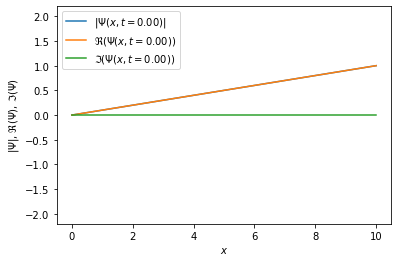

In [19]:
def animate_wave(x, v, m, wave0, fps, t1=0, t2=None, realtime=True, real=False, imag=False):
    assert not (not realtime and t2 is None), "non-realtime animation must be finite in time"
    
    dt = 1 / fps
    
    fig, ax = plt.subplots()
    
    # prevent duplicate animation figure in non-realtime mode
    #if not realtime:
        #clear_output()
        
    ax.set_xlabel("$x$")
    ax.set_ylabel("$|\Psi|$, $\Re{(\Psi)}$, $\Im{(\Psi)}$")
    
    # the commas matter!
    ymax = max(np.max(np.abs(wave0)**2), np.max(np.abs(wave0)))
    graph, = ax.plot([x[0], x[-1]], [0, +2*ymax]) # plot 2x wave0 to make room
    if real:
        graph2, = ax.plot([x[0], x[-1]], [0, -2*ymax]) # make room for negative values
    if imag:
        graph3, = ax.plot([x[0], x[-1]], [0, -2*ymax]) # make room for negative values

    def animate(i):
        time = i*dt
        wave = meaningless_wave(x, time)
        
        graph.set_data(x, np.abs(wave))
        graph.set_label(f"$|\Psi(x, t = {time:.2f})|$")
        
        if real:
            graph2.set_data(x, np.real(wave))
            graph2.set_label(f"$\Re(\Psi(x, t = {time:.2f}))$")
        if imag:
            graph3.set_data(x, np.imag(wave))
            graph3.set_label(f"$\Im(\Psi(x, t = {time:.2f}))$")
            
        ax.legend(loc="upper left")
        
    if t2 is None:
        frames = None # animate forever
    else:
        frames = int((t2 - t1) / dt) # animate till t2

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames, interval=dt*1000, repeat=False)
         
    if realtime:
        return ani
    else:
        return HTML(ani.to_jshtml())
    
def meaningless_wave(x, time):
    return (x/np.max(x)) * np.exp(1j * x * time)

# example usage:
x = np.linspace(0, 10, 400)
wave0 = meaningless_wave(x, 0)
animate_wave(x, v_infwell, 1, wave0, 25, t2=2, realtime=False, real=True, imag=True)

I resten av øvingen skal vi rett og slett bare teste ut animasjonsfunksjonen på en del forskjellige situasjoner.

### Partikkel i boks

I regneøvingene har vi sett på superposisjonen av grunntilstanden og første eksiterte tilstand
$$ \Psi(x, 0) = \frac{1}{\sqrt{2}} (\psi_1(x) + \psi_2(x)) $$
for en partikkel i boks.
Vi fant så at sannsynlighetstettheten $|\Psi(x, t)|^2$ skulle oscillere fram og tilbake med perioden
$$ T = \frac{2 \pi \hbar}{E_2 - E_1} $$

**Preparér denne starttilstanden for et elektron i en boks og bekreft at perioden er riktig. Du kan for eksempel variere størrelsen på boksen for å finne en periode du har tid til å observere.**

### Fri partikkel representert ved Gaussisk bølgepakke

I regneøvingene har vi også sett hvordan vi kan representere en fri partikkel som en gaussisk bølgepakke
$$ \Psi(x, 0) = (2 \pi \Delta x^2)^{-1/4} e^{-(x-x_0)^2/4 \Delta x^2} e^{i p_0 x / \hbar} $$
med 
$$ \langle x \rangle = x_0 \quad \text{og} \quad \langle p \rangle = p_0 $$
Slik oppnådde vi også et "beste kompromiss" mellom usikkerhetene i posisjon $\Delta x$ og impuls $\Delta p$, nemlig
$$ \Delta x \Delta p = \hbar / 2 $$
Dette er altså det nærmeste vi kommer å kunne representere en fri partikkel med en noenlunde veldefinert posisjon **og** impuls.

**Plassér et elektron i en uendelig brønn med en gaussisk bølgepakke. Sørg for at den har plass til å bevege seg et stykke før den kræsjer i veggen. Studér utviklingen over tid. Hva skjer med formen til bølgepakken over tid? Hva skjer ved veggene? Hvilken hastighet har bølgepakkens tyngdepunkt?**

### Koherent tilstand i harmonisk oscillator

En forskjøvet grunntilstand
$$ \Psi(x, 0) = \left(\frac{m \omega}{\pi \hbar}\right)^{1/4} e^{-m \omega (x-x_0)^2 / \pi \hbar} $$
i den harmoniske oscillatoren kalles på engelsk en *coherent state*.
På norsk kan vi kalle dette en *koherent* eller kanskje en *sammenhengende tilstand*.
Slike tilstander er av spesiell interesse når vi sammenligner kvantemekanikken med den klassiske mekanikken.

**Studér tidsutviklingen til en slik tilstand for et elektron i en harmonisk oscillator. Plassér den et sted til siden for sentrum av oscillatoren. Kan du se for deg motivasjonen bak navngivningen? Hvilken karakteristisk egenskap ved tilstanden tror du gjør den spesielt relevant for sammenligning med klassisk mekanikk?**

### Transmisjon og refleksjon av fri partikkel ved potensialbarriere

I den klassiske mekanikken kan en partikkel umulig befinne seg i et område der partikkelens energi er lavere enn den potensielle energien.
Men i kvantemekanikken er ikke ting så enkelt.
Her kan en partikkel bevege seg gjennom et potensial, selv om potensialet på et punkt er høyere enn partikkelens energi.
Mulighetene for transmisjon og refleksjon avhenger spesielt av partikkelens (forventede) energi
$$ \langle E \rangle = \sum_{n=1}^N |c_n|^2 E_n $$

**Send et fritt elektron (i form av en gaussisk bølgepakke) inn mot en potensialbarriere. Studér transmisjonen og refleksjonen av bølgepakken. Undersøk hvordan partikkelens (forventede) energi påvirker dens muligheter for å reflekteres og transmitteres, særlig for energier rundt barrierehøyden. Du kan enkelt variere energien ved å justere for eksempel partikkelens impuls.**

### Avsluttende ord

**Prøv ut tidsutvikleren på andre starttilstander i andre potensialer, om du har tid og lyst!**